You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

In [1]:
import pandas as pd

In [3]:
ride_count = pd.read_csv('project_sql_result_01.csv')
dropoffs = pd.read_csv('project_sql_result_04.csv')
weather_length = pd.read_csv('project_sql_result_07.csv')

In [5]:
ride_count

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [6]:
ride_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
ride_count['trips_amount'].value_counts()

29       3
14       3
21       2
33       2
7        2
15       2
127      1
1955     1
9888     1
31       1
11422    1
27       1
25       1
5015     1
3355     1
16       1
20       1
1404     1
146      1
1296     1
13       1
12       1
4383     1
8        1
5        1
3        1
2        1
36       1
37       1
39       1
9299     1
250      1
1014     1
1775     1
10367    1
7701     1
210      1
3175     1
19558    1
11       1
9181     1
7455     1
978      1
2216     1
1486     1
2070     1
1607     1
5953     1
230      1
2235     1
310      1
402      1
1259     1
428      1
147      1
8448     1
Name: trips_amount, dtype: int64

In [8]:
ride_count.duplicated().sum()

0

In [9]:
dropoffs

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [10]:
dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [11]:
dropoffs.duplicated().sum()

0

In [12]:
weather_length

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [13]:
weather_length.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
weather_length['start_ts'] = pd.to_datetime(weather_length['start_ts'])
weather_length.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [19]:
top_drops = dropoffs.head(10)
top_drops

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


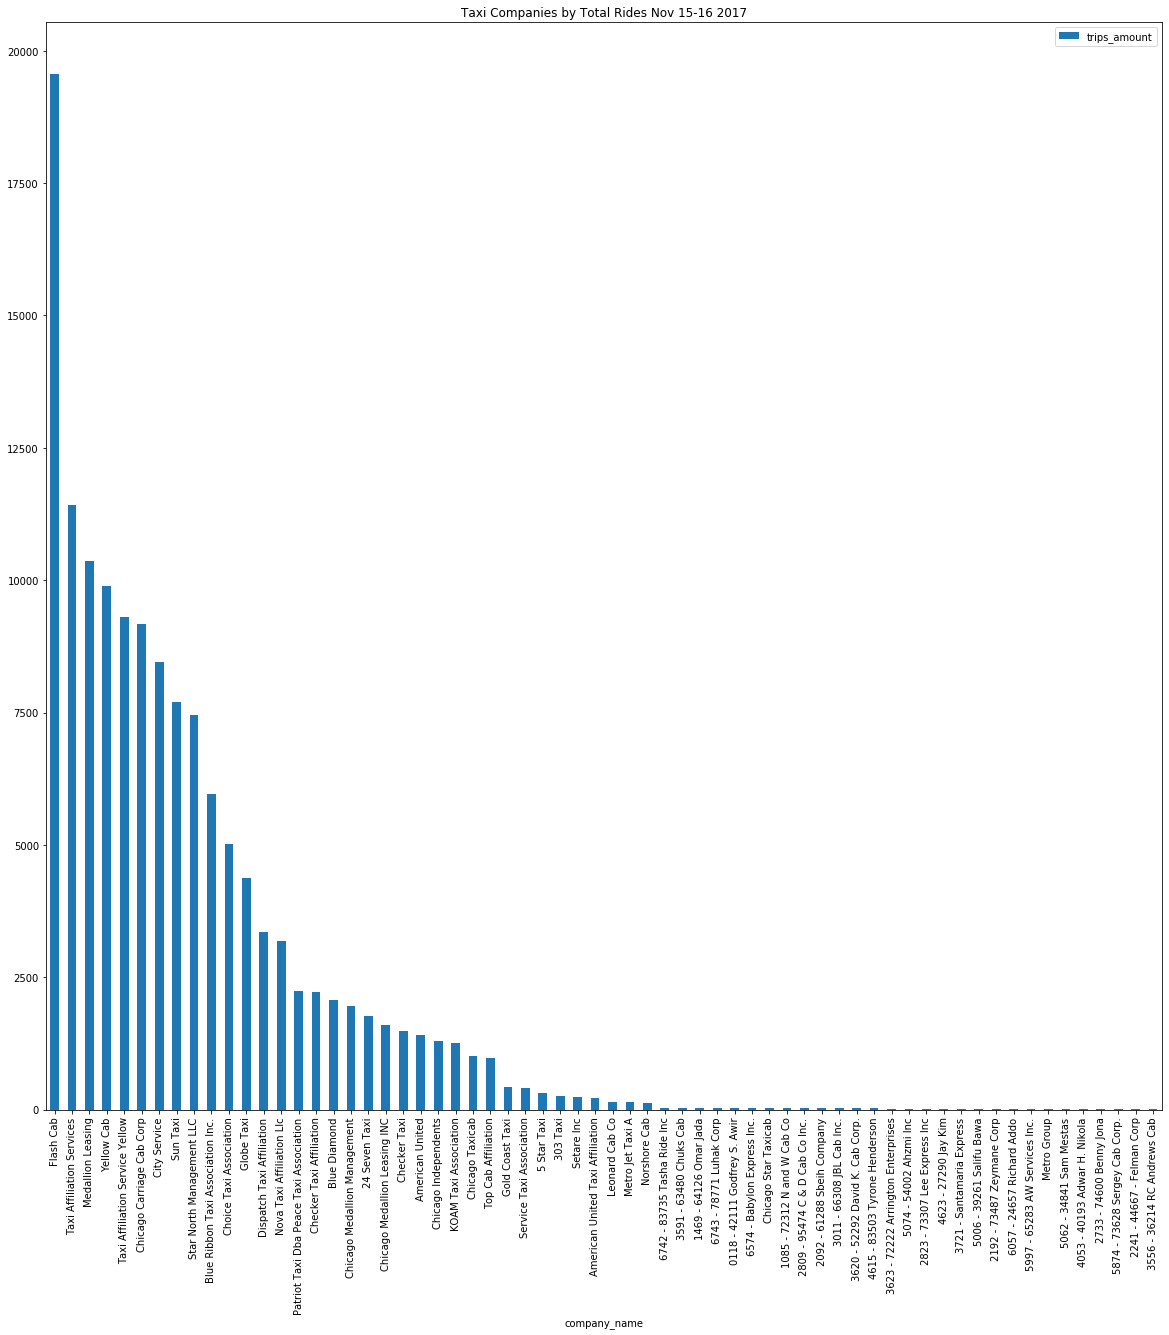

In [20]:
ride_count.plot(kind='bar', title='Taxi Companies by Total Rides Nov 15-16 2017', figsize=(20,20), x='company_name')

This graph shows the total trips made in Chicago on Nov 15-16 2017, by cab company. The companies are arranged from most to least rides, and you can easily tell that about half of the companies are not very popular, and based on the names, many appear to be individual drivers or perhaps are just a few employees and cars, which would also explain the low fare numbers. The majority of rides are dominated by the top 15 companies. This data is interesting, but further research should be done to obtain more input, as these numbers are based on two days, which is a small sample size.

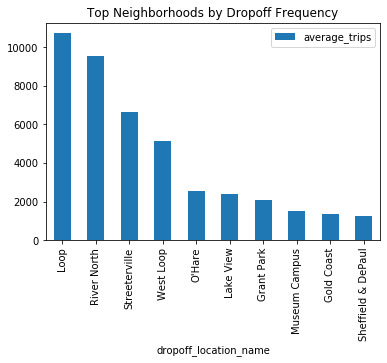

In [21]:
top_drops.plot(kind='bar', title='Top Neighborhoods by Dropoff Frequency', x='dropoff_location_name', y='average_trips')

With this graph, we can also see that locations of dropoffs center around a few areas. The Loop, River North, Streeterville and West Loop appear to be the most popular locations to be brought to. The Loop is in the heart of the city, with lots of venues and restaurants, and is probably a place people call cabs for to recreation. The other neighborhoods could also be popular for recreation, but also perhaps they are areas where many people commute to work. It would be good to see typical businesses and housing in each area. Knowing where people are getting dropped off can also help us keep cars in the area for when people need to return home.

In [22]:
from scipy import stats
weather_length['start_ts'].dt.weekday.value_counts()


5    1068
Name: start_ts, dtype: int64

All data from weather_length applies to Saturdays, data can be split purely by weather.

In [25]:
bad_sat = weather_length.query('weather_conditions=="Bad"')
good_sat = weather_length.query('weather_conditions=="Good"')
stats.ttest_ind(bad_sat['duration_seconds'], good_sat['duration_seconds'])

Ttest_indResult(statistic=6.946177714041499, pvalue=6.517970327099473e-12)

P-value of the independent t-test between Saturday rides on good weather and bad weather days is very, very small. P-value is 6.52e-12. The typical alpha values are .1 and .05, and this p-value is smaller than both of them, so it is safe to assume that we reject the null hypothesis that there is no difference between rides on good weather and bad weather days. It appears that there is strong evidence for a difference in rides depending on the weather. This test is only looking at whether there is a change, we did not look at whether the rides increase or decrease depending on what the weather is.

We can draw a few overall conclusions from this data. Most dropoffs of taxi rides are in a few specific neighborhoods, and an overwhelming majority of rides are taken with a small number of cab companies, and Flash Cab is far and away the most popular company. We also know that there is a marked difference in the number of rides taken from the Loop to O'Hare depending on the weather. More investigation will have to be done to see which direction the number of rides go, depending on how the weather is.

This is a brief look into the cab activity of Chicago, as we are only looking at a very narrow date range (2 days) for cab company activity, and only at a month for Saturday trips from the Loop to O'Hare. Dropoff location frequency is only based on one month's data. This is a good exploration into customer habits, but more data will need to be analyzed to make any true assessments on activity.